In [1]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader("C:/Users/Acer/OneDrive/Documents/books/python/python-crash-course.pdf")#loading the pdf fromt the google drive

c:\Users\Acer\OneDrive\Documents\code folder\AI\lcenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=loader.load()#it loads the data

In [3]:
print(data[0])#this shows descriptuion of the pdf

page_content='A HANDS-ON , PROJECT-BASED
INTRODUCTION TO PROGRAMMING
ERIC MATTHES
P Y THON
C R ASH COURSE
P Y THON
C R ASH COURSE
SHELVE IN:
PROGRAMMING LANGUAGES/
PYTHON
$39.95 ($45.95 CDN)
FAST!
LEARN PYTHON—
FAST!
LEARN PYTHON—
PYTHON CRASH COURSEPYTHON CRASH COURSEMATTHES
COVERS PYTHON 2 AND 3
Python Crash Course is a fast-paced, thorough intro-
duction to programming with Python that will have you 
writing programs, solving problems, and making things 
that work in no time. 
In the first half of the book, you’ll learn about basic 
programming concepts, such as lists, dictionaries, 
classes, and loops, and practice writing clean and 
readable code with exercises for each topic. You’ll 
also learn how to make your programs interactive 
and how to test your code safely before adding it to 
a project. In the second half of the book, you’ll put 
your new knowledge into practice with three substantial 
projects: a Space Invaders–inspired arcade game, data 
visualizations with Python’s s

In [4]:
print(data[1])

page_content='Python Crash Course' metadata={'producer': 'Adobe PDF Library 9.9', 'creator': 'Adobe InDesign CS5.5 (7.5.3)', 'creationdate': '2015-10-26T15:01:49-07:00', 'moddate': '2015-10-27T15:56:06-07:00', 'trapped': '/False', 'source': 'C:/Users/Acer/OneDrive/Documents/books/python/python-crash-course.pdf', 'total_pages': 562, 'page': 1, 'page_label': 'i'}


In [5]:
print(data[0].metadata)

{'producer': 'Adobe PDF Library 9.9', 'creator': 'Adobe InDesign CS5.5 (7.5.3)', 'creationdate': '2015-10-26T15:01:49-07:00', 'moddate': '2015-10-27T15:56:06-07:00', 'trapped': '/False', 'source': 'C:/Users/Acer/OneDrive/Documents/books/python/python-crash-course.pdf', 'total_pages': 562, 'page': 0, 'page_label': 'i'}


In [6]:
print(data[0].page_content[:100])

A HANDS-ON , PROJECT-BASED
INTRODUCTION TO PROGRAMMING
ERIC MATTHES
P Y THON
C R ASH COURSE
P Y THON


### **SPLITTING THE DATA**
- Some times called chuking
- The data is divided in chunks
- The ```chunk_size``` parameter is used to control the chunksize
- The ```chunk_overlap``` parameter: used to caputre important information that may be lost between data.

In [7]:
from langchain_text_splitters import CharacterTextSplitter
text=''
text_splitter=CharacterTextSplitter(
    separator='\n',
    chunk_size=1000,
    chunk_overlap=10#
)
chunks=text_splitter.split_text(text)
print(chunks)
print(len(chunk) for chunk in chunks)

[]
<generator object <genexpr> at 0x00000202445A2260>


In [8]:
#this may not work properly thus we use
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(
    separators=['\n\n','\n',' ',' '],
    chunk_size=1000,
    chunk_overlap=10
)
chunks=text_splitter.split_text(text)
print(chunks)
print(len(chunk) for chunk in chunks)
'''Recrursivecharactersplitter often preservs more context which will result in more
coherent response from'''

[]
<generator object <genexpr> at 0x00000202445A2330>


'Recrursivecharactersplitter often preservs more context which will result in more\ncoherent response from'

In [9]:
#for the pdf we use
splitter=RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=10
)
chunks=splitter.split_documents(data)
print(chunks)
print(len(chunk.page_content) for chunk in chunks)
print(len(chunks))


[Document(metadata={'producer': 'Adobe PDF Library 9.9', 'creator': 'Adobe InDesign CS5.5 (7.5.3)', 'creationdate': '2015-10-26T15:01:49-07:00', 'moddate': '2015-10-27T15:56:06-07:00', 'trapped': '/False', 'source': 'C:/Users/Acer/OneDrive/Documents/books/python/python-crash-course.pdf', 'total_pages': 562, 'page': 0, 'page_label': 'i'}, page_content='A HANDS-ON , PROJECT-BASED\nINTRODUCTION TO PROGRAMMING\nERIC MATTHES\nP Y THON\nC R ASH COURSE\nP Y THON\nC R ASH COURSE\nSHELVE IN:\nPROGRAMMING LANGUAGES/\nPYTHON\n$39.95 ($45.95 CDN)\nFAST!\nLEARN PYTHON—\nFAST!\nLEARN PYTHON—\nPYTHON CRASH COURSEPYTHON CRASH COURSEMATTHES\nCOVERS PYTHON 2 AND 3\nPython Crash Course is a fast-paced, thorough intro-\nduction to programming with Python that will have you \nwriting programs, solving problems, and making things \nthat work in no time. \nIn the first half of the book, you’ll learn about basic \nprogramming concepts, such as lists, dictionaries, \nclasses, and loops, and practice writing cl

In [10]:
print(list(len(chunk.page_content) for chunk in chunks))

[954, 988, 131, 19, 112, 994, 967, 597, 895, 141, 979, 928, 247, 949, 609, 912, 938, 977, 800, 972, 953, 996, 910, 566, 918, 994, 969, 991, 871, 925, 910, 895, 956, 959, 107, 911, 940, 989, 910, 316, 901, 930, 907, 946, 692, 950, 954, 952, 987, 835, 964, 964, 933, 965, 103, 957, 975, 896, 986, 956, 211, 947, 997, 934, 960, 932, 956, 936, 962, 930, 655, 989, 920, 982, 920, 432, 956, 948, 924, 929, 782, 921, 903, 985, 968, 704, 938, 997, 956, 978, 397, 997, 973, 905, 999, 403, 971, 463, 781, 942, 993, 753, 955, 958, 981, 679, 970, 488, 878, 679, 997, 941, 400, 951, 939, 395, 995, 963, 432, 941, 149, 963, 959, 72, 936, 971, 188, 963, 957, 308, 938, 622, 939, 926, 263, 985, 992, 302, 871, 986, 969, 557, 997, 933, 176, 993, 950, 228, 514, 987, 883, 988, 921, 383, 999, 958, 387, 944, 753, 955, 918, 957, 546, 969, 947, 996, 940, 130, 988, 948, 210, 957, 959, 99, 970, 431, 992, 808, 961, 738, 989, 859, 991, 989, 512, 987, 994, 84, 941, 428, 658, 974, 846, 956, 977, 972, 953, 990, 624, 950, 756

### **EMBEDDING AND STORING THE CHUNKS**

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
from langchain_chroma import Chroma

In [12]:
vector_store=Chroma.from_documents(
    documents=chunks,
    embedding=embeddings
)

### **LCEL**
- Langchain expressive language is a declerative language syantax defining chains suited from prototypes to production.
- It is relevant to rag system.


**Intoduction to LCEL for RAG**
- 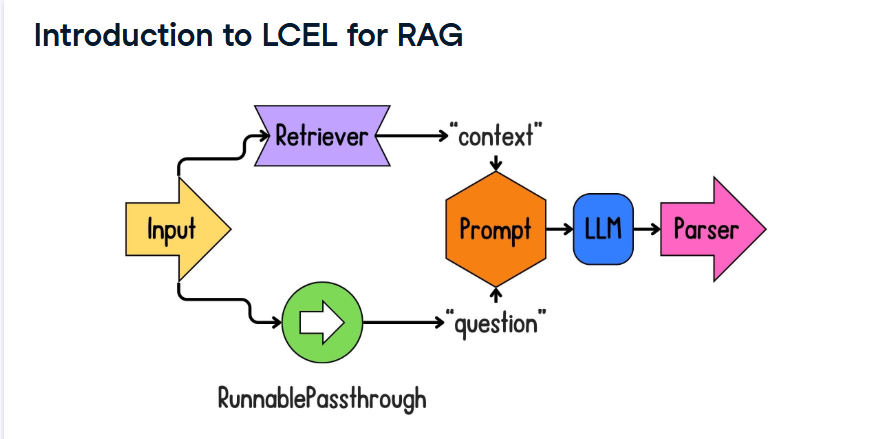
- we need to create three components
    - Retriver
    - prompt template
    - model to generate the response


In [13]:
retriever=vector_store.as_retriever(
    search_type="similarity",
    search_kwargs={"k":2}
    
)
'''
    search_type: what search to use
    search_kwargs: how many chunks to retrieve when queried (k)'''

'\n    search_type: what search to use\n    search_kwargs: how many chunks to retrieve when queried (k)'

### **Creating a prompt template**


In [14]:
from langchain_core.prompts import ChatPromptTemplate
prompt=ChatPromptTemplate.from_template("""
                  Use the following pieces of context to answer the question at the end.
                  If tou do not know the answer, say that you do not know.
                  Context:{context}
                  Question:{question}                   
                                        """)

In [19]:
# Option 1: Using Groq (Free, Fast) - Get API key from https://console.groq.com/
from langchain_groq import ChatGroq
import os
os.environ["GROQ_API_KEY"] = "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"  # Replace with your actual key
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)

# Option 2: Using OpenAI (Paid) - Uncomment to use
# from langchain_openai import ChatOpenAI
# os.environ["OPENAI_API_KEY"] = "your-api-key-here"
# llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Option 3: Using Google Gemini (Free tier) - Uncomment to use
# from langchain_google_genai import ChatGoogleGenerativeAI
# os.environ["GOOGLE_API_KEY"] = "your-api-key-here"
# llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0)

In [20]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

In [21]:
from operator import itemgetter

chain=(
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    |prompt
    |llm
    |StrOutputParser()
)

### **INVOKING THE RETRIVAL CHAIN**

In [23]:
result=chain.invoke({"question":"How is the alien game made?"})
print(result)

The alien game, also known as Alien Invasion, is made using the Pygame library in Python. The game is built in phases, with the first phase involving the creation of a ship that can move right and left and fire bullets. 

Here's a general overview of how the game is made based on the provided context:

1. **Game Description**: The game is described as a space-themed shooter where the player controls a ship at the bottom of the screen, moving it left and right using the arrow keys and shooting bullets using the spacebar. The goal is to destroy a fleet of aliens moving across and down the screen.

2. **Ship Creation**: The first phase of development involves creating a ship that can move right and left. The ship should also be able to fire bullets when the player presses the spacebar.

3. **Alien Class Creation**: A class called `Alien` is created, which represents a single alien in the fleet. This class inherits from Pygame's `Sprite` class. The `Alien` class has an `__init__` method th